In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [2]:
import pandas as pd
df = pd.read_csv('C:/Users/lenovo/Desktop/jupyternotebook/Hmelq.csv')
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bad,3576.0,0.199385,0.399594,0.00,0.00,0.000,0.00,1.000
loan,3576.0,18529.697987,11262.834060,1100.00,11000.00,16200.000,23100.00,89900.000
mortdue,3262.0,74013.907992,44016.833772,2619.00,46700.25,65858.000,91717.00,399550.000
value,3512.0,101076.922759,54865.275351,8800.00,65753.00,89183.000,118928.25,850000.000
yoj,3264.0,8.832644,7.568046,0.00,3.00,7.000,13.00,41.000
derog,3149.0,0.261670,0.865178,0.00,0.00,0.000,0.00,10.000
delinq,3225.0,0.432558,1.099230,0.00,0.00,0.000,0.00,15.000
clage,3397.0,179.832529,87.066198,0.49,115.60,173.640,230.71,1168.230
ninq,3273.0,1.186373,1.728723,0.00,0.00,1.000,2.00,17.000
clno,3443.0,21.507116,10.167490,0.00,15.00,20.000,26.00,71.000


In [4]:
df.shape

(3576, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
bad        3576 non-null int64
loan       3576 non-null int64
mortdue    3262 non-null float64
value      3512 non-null float64
reason     3429 non-null object
job        3409 non-null object
yoj        3264 non-null float64
derog      3149 non-null float64
delinq     3225 non-null float64
clage      3397 non-null float64
ninq       3273 non-null float64
clno       3443 non-null float64
debtinc    2809 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 363.3+ KB


In [6]:
dfnumeric=df.select_dtypes(include=['float64','int64'])
dfnumeric.describe().T

,count,mean,std,min,25%,50%,75%,max
bad,3576.0,0.199385,0.399594,0.00,0.00,0.000,0.00,1.000
loan,3576.0,18529.697987,11262.834060,1100.00,11000.00,16200.000,23100.00,89900.000
mortdue,3262.0,74013.907992,44016.833772,2619.00,46700.25,65858.000,91717.00,399550.000
value,3512.0,101076.922759,54865.275351,8800.00,65753.00,89183.000,118928.25,850000.000
yoj,3264.0,8.832644,7.568046,0.00,3.00,7.000,13.00,41.000
derog,3149.0,0.261670,0.865178,0.00,0.00,0.000,0.00,10.000
delinq,3225.0,0.432558,1.099230,0.00,0.00,0.000,0.00,15.000
clage,3397.0,179.832529,87.066198,0.49,115.60,173.640,230.71,1168.230
ninq,3273.0,1.186373,1.728723,0.00,0.00,1.000,2.00,17.000
clno,3443.0,21.507116,10.167490,0.00,15.00,20.000,26.00,71.000


In [7]:
dfcategoric=df.select_dtypes(include=['object'])
dfcategoric.describe().T

,count,unique,top,freq
reason,3429,2,DebtCon,2371
job,3409,6,Other,1431


In [8]:
df.isnull().sum().sort_values(ascending=False)

debtinc    767
derog      427
delinq     351
mortdue    314
yoj        312
ninq       303
clage      179
job        167
reason     147
clno       133
value       64
loan         0
bad          0
dtype: int64

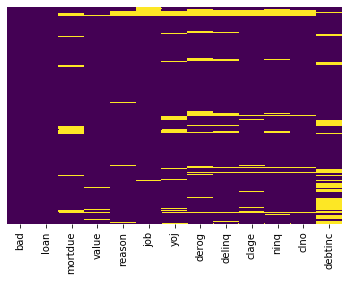

In [9]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [10]:
def eksik_deger_tablosu(data):
    eksik_deger = data.isnull().sum()
    eksik_deger_yuzde = 100 * data.isnull().sum()/len(data)
    eksik_deger_tablo = pd.concat([eksik_deger, eksik_deger_yuzde], axis=1)
    eksik_deger_tablo_son = eksik_deger_tablo.rename(
    columns = {0 : 'Eksik Değerler', 1 : '% Değeri'})
    return eksik_deger_tablo_son
eksik_deger_tablosu(df)

,Eksik Değerler,% Değeri
bad,0,0.000000
loan,0,0.000000
mortdue,314,8.780761
value,64,1.789709
reason,147,4.110738
job,167,4.670022
yoj,312,8.724832
derog,427,11.940716
delinq,351,9.815436
clage,179,5.005593


In [11]:
dfnan= df.copy()

In [12]:
dfnan['value'].unique()[0]
dfnan['value'] = dfnan['value'].fillna(dfnan['value'].unique()[0])
dfnan['clno'].unique()[0]
dfnan['clno'] = dfnan['clno'].fillna(dfnan['clno'].unique()[0])
##ilk satır değeri ile doldurduk.

In [13]:
dfnan["job"] = dfnan["job"].fillna(dfnan["job"].mode()[0])
dfnan["reason"] = dfnan["reason"].fillna(dfnan["reason"].mode()[0])

In [14]:
dfnan['derog'] = dfnan['derog'].fillna(dfnan['derog'].mean())
dfnan['delinq'] = dfnan['delinq'].fillna(dfnan['delinq'].mean())
dfnan['yoj'] = dfnan['yoj'].fillna(dfnan['yoj'].mean())
dfnan['ninq'] = dfnan['ninq'].fillna(dfnan['ninq'].mean())
dfnan['mortdue'] = dfnan['mortdue'].fillna(dfnan['mortdue'].mean())
dfnan['clage'] = dfnan['clage'].fillna(dfnan['clage'].mean())

In [15]:
dfnan.dropna(subset=["debtinc"], inplace = True)

In [16]:
dfnan.isnull().sum()

bad        0
loan       0
mortdue    0
value      0
reason     0
job        0
yoj        0
derog      0
delinq     0
clage      0
ninq       0
clno       0
debtinc    0
dtype: int64

In [17]:
dfnan.shape

(2809, 13)

In [35]:
def class_imbalance(data_frame, col):
    try:
        # Stores value counts
        col_vals = data_frame[col].value_counts()
        # Resets index to make index a column in data frame
        col_vals = col_vals.reset_index()
        # If the number of unique instances in column exceeds 20 print warning
        if len(col_vals['index']) > 20:
            print('Warning: values in column are more than 20 \nPlease try a column with lower value counts!')
        # Else it calculates/prints percentage for each unique value in column
        else:
            # Create a function to output the percentage
            f = lambda x, y: 100 * (x / sum(y))
            for i in range(0, len(col_vals['index'])):
                print('{0} accounts for {1:.2f}% of the {2} column'\
                      .format(col_vals['index'][i],
                              f(col_vals[col].iloc[i],
                                col_vals[col]),
                              col))
    # try-except block goes here if it can't find the column in data frame
    except KeyError as e:
        print('{0}: Not found'.format(e))
        print('Please choose the right column name!')

In [36]:
class_imbalance(dfnan, 'bad')

0 accounts for 91.53% of the bad column
1 accounts for 8.47% of the bad column


In [37]:
dfnan["bad"].value_counts()

0    2571
1     238
Name: bad, dtype: int64

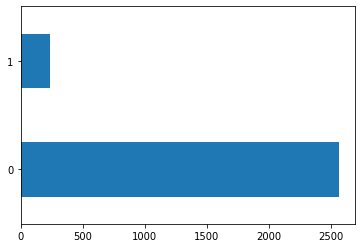

In [38]:
dfnan["bad"].value_counts().plot.barh();

In [20]:
dms = pd.get_dummies(dfnan[['reason', 'job']])
dms.head()
y = dfnan["bad"]
X_ = dfnan.drop(["bad", "reason", "job"], axis = 1).astype("float64")
X_.head()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
0,81200.0,18834.0,108355.0,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,12600.0,103960.0,127384.0,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,18000.0,46865.0,61266.0,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,10300.0,57676.0,71027.0,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,9400.0,56508.0,78358.0,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [21]:
X = pd.concat([X_, dms[["reason_HomeImp", "job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","job_Self"]]], axis = 1)
X.head()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
0,81200.0,18834.0,108355.0,28.0,0.0,0.0,139.14,0.0,14.0,34.042,1,0,0,1,0,0,0
1,12600.0,103960.0,127384.0,2.0,0.0,0.0,129.02,0.0,25.0,34.479,0,0,0,1,0,0,0
2,18000.0,46865.0,61266.0,5.0,0.0,0.0,102.59,2.0,9.0,26.354,0,0,0,1,0,0,0
3,10300.0,57676.0,71027.0,19.0,0.0,0.0,157.52,1.0,11.0,33.992,0,0,0,1,0,0,0
4,9400.0,56508.0,78358.0,17.0,0.0,0.0,141.93,0.0,11.0,32.327,0,0,0,1,0,0,0


# DecisionTreeClassifier

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1966, 17)
(843, 17)
(1966,)
(843,)


In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
cart=DecisionTreeClassifier()
cart_model=cart.fit(X_train,y_train)
cart_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [26]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9323843416370107

In [ ]:
accuracy yüksek, 

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       773
           1       0.61      0.51      0.56        70

    accuracy                           0.93       843
   macro avg       0.78      0.74      0.76       843
weighted avg       0.93      0.93      0.93       843



In [28]:
?cart_model

In [29]:
cart_grid = {"max_depth": range(1,10),
             "min_samples_split" : list(range(2,50))}

In [30]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv=10, n_jobs=-1, verbose=1)
cart_cv_model=cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 1541 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:   23.5s finished


In [31]:
print("En iyi paramatreler: " + str(cart_cv_model.best_params_))

En iyi paramatreler: {'max_depth': 8, 'min_samples_split': 3}


In [32]:
cart = tree.DecisionTreeClassifier(max_depth=8, min_samples_split=3)
cart_tuned=cart.fit(X_train, y_train)

In [33]:
y_pred=cart_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.9371293001186239

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       773
           1       0.79      0.33      0.46        70

    accuracy                           0.94       843
   macro avg       0.87      0.66      0.72       843
weighted avg       0.93      0.94      0.92       843



# RandomForestClassifier

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1966, 17)
(843, 17)
(1966,)
(843,)


In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf_model=RandomForestClassifier().fit(X_train,y_train)
rf_model

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
y_pred=rf_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9406880189798339

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       773
           1       0.95      0.30      0.46        70

    accuracy                           0.94       843
   macro avg       0.95      0.65      0.71       843
weighted avg       0.94      0.94      0.93       843



In [44]:
?rf_model

In [45]:
rf_params= {"max_depth": [2,5,8],
           "max_features": [2,5,8],
           "n_estimators": [10,50,500],
           "min_samples_split": [2,5,8]}

In [47]:
rf_model = RandomForestClassifier()
rf_cv_model=GridSearchCV(rf_model,rf_params,cv=10,n_jobs=-1,verbose=2)
rf_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 479 tasks      | elapsed:   48.9s
[Parallel(n_jobs=-1)]: Done 762 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  1.8min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [48]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 8, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 500}


In [49]:
rf_tuned = RandomForestClassifier(max_depth = 8,
                                 max_features =8,
                                 min_samples_split=2,
                                 n_estimators=500)

In [50]:
rf_tuned.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
y_pred=rf_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.9383155397390273

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       773
           1       1.00      0.26      0.41        70

    accuracy                           0.94       843
   macro avg       0.97      0.63      0.69       843
weighted avg       0.94      0.94      0.92       843



In [53]:
Importance = pd.DataFrame({"Importance":rf_tuned.feature_importances_*100}, index=X_train.columns)

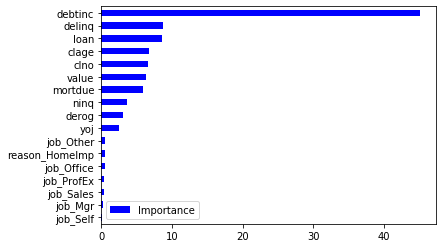

In [54]:
Importance.sort_values(by="Importance", axis=0, ascending=True).plot(kind="barh", color ='b')
plt.show()

In [55]:
Importance

,Importance
loan,8.652180
mortdue,5.974272
value,6.289143
yoj,2.510725
derog,3.062875
delinq,8.763033
clage,6.772825
ninq,3.605424
clno,6.658266
debtinc,45.103001


# MLPClassifier

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1966, 17)
(843, 17)
(1966,)
(843,)


In [57]:
from sklearn.preprocessing import StandardScaler 
scaler =StandardScaler()

In [58]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
from sklearn.neural_network import MLPClassifier

In [60]:
mlpc = MLPClassifier().fit(X_train_scaled, y_train)
mlpc

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [61]:
y_pred= mlpc.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.9406880189798339

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       773
           1       0.86      0.34      0.49        70

    accuracy                           0.94       843
   macro avg       0.90      0.67      0.73       843
weighted avg       0.94      0.94      0.93       843



In [63]:
?mlpc

In [64]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}

In [65]:
mlpc= MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, cv=10,n_jobs=-1, verbose=2)
mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  9.2min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_st...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         '

In [66]:
print("En iyi parametreler : " + str(mlpc_cv_model.best_params_))

En iyi parametreler : {'activation': 'relu', 'alpha': 0.02, 'hidden_layer_sizes': (100, 100), 'solver': 'lbfgs'}


In [67]:
mlpc_tuned = MLPClassifier(activation = "relu", alpha=0.02, hidden_layer_sizes=(100,100), solver = "lbfgs")

In [68]:
mlpc_tuned.fit(X_train_scaled, y_train)
y_pred=mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.9454329774614472

In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       773
           1       0.83      0.43      0.57        70

    accuracy                           0.95       843
   macro avg       0.89      0.71      0.77       843
weighted avg       0.94      0.95      0.94       843

